<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio Clustering


### Contexto del Problema

Eres un científico de datos contratado por una federación deportiva internacional que desea mejorar sus programas de entrenamiento personalizados. La federación maneja una gran variedad de atletas que participan en diferentes disciplinas deportivas, y cada uno tiene necesidades de entrenamiento y desarrollo únicas. Para maximizar el rendimiento y mejorar la efectividad de los programas de entrenamiento, la federación quiere segmentar a sus atletas en grupos homogéneos basados en sus características físicas, habilidades y comportamientos de entrenamiento.


### Los datos

- **name**: Nombre del atleta. Es una variable categórica que identifica a cada atleta de manera única.

- **gender**: Género del atleta. Es una variable categórica que indica si el atleta es masculino ("Male") o femenino ("Female").

- **age**: Edad del atleta. Es una variable numérica que representa la edad del atleta en años.

- **height**: Altura del atleta. Es una variable numérica que representa la altura del atleta en centímetros.

- **nationality**: Nacionalidad del atleta. Es una variable categórica que indica el país de origen del atleta.

- **weight**: Peso del atleta. Es una variable numérica que representa el peso del atleta en kilogramos.

- **sports**: Deportes que practica el atleta. Es una variable categórica que puede contener múltiples valores (deportes) separados por comas.

- **hours_per_day**: Horas de entrenamiento por día. Es una variable numérica que indica el número promedio de horas que el atleta entrena cada día.

- **strength**: Fuerza del atleta. Es una variable numérica que representa la evaluación de la fuerza del atleta en una escala (por ejemplo, de 1 a 10).

- **agility**: Agilidad del atleta. Es una variable numérica que representa la evaluación de la agilidad del atleta en una escala (por ejemplo, de 1 a 10).

- **mental**: Capacidad mental del atleta. Es una variable numérica que representa la evaluación de la capacidad mental del atleta en una escala (por ejemplo, de 1 a 10).

- **federation**: Federación a la que pertenece el atleta. Es una variable categórica que indica la organización deportiva a la que está afiliado el atleta.

- **year_start**: Año de inicio. Es una variable numérica que indica el año en que el atleta comenzó su carrera o se unió a la federación.

- **rank**: Rango del atleta. Es una variable numérica que representa la posición o clasificación del atleta en su disciplina o federación.


### Objetivo del Ejercicio

El objetivo principal de este ejercicio es que los alumnos practiquen y desarrollen habilidades en el análisis de datos, preprocesamiento y técnicas de clustering aplicadas a un problema real en el ámbito deportivo. Al completar este ejercicio, los alumnos deberán ser capaces de:

1. **Realizar un Análisis Exploratorio de Datos (EDA)**:
    - Comprender la estructura y distribución de los datos.
    - Identificar patrones y relaciones significativas entre las variables.
    - Manejar valores faltantes y atípicos de manera efectiva.
    - Visualizar las características más relevantes.

2. **Preprocesar los Datos de Manera Adecuada**:
    - Convertir variables categóricas en variables numéricas.
    - Escalar las variables numéricas para asegurar una contribución equitativa al análisis de clustering.
    - Seleccionar las características más relevantes que contribuirán al análisis de clustering.

3. **Aplicar Técnicas de Clustering para Segmentar a los Atletas**:
    - Probar diferentes métodos de clustering (e.g., K-means, DBSCAN, Hierarchical Clustering) para identificar el más adecuado para los datos proporcionados.
    - Determinar el número óptimo de clusters utilizando métodos como el codo (Elbow Method) o la silueta (Silhouette Score).
    - Visualizar los clusters obtenidos y analizar sus características distintivas.

4. **Extraer Conclusiones y Proporcionar Recomendaciones de Entrenamiento**:
    - Describir las características principales de cada cluster identificado.
    - Proporcionar recomendaciones prácticas y accionables para personalizar los programas de entrenamiento para cada grupo de atletas.
¡

In [243]:
import pandas as pd
import numpy as np
from src import soporte_eda_y_outliers as s_eda, soporte_encoding as s_encoding, soporte_clustering as s_clustering
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [244]:
df = pd.read_csv("datos\WrestlingWorldTournament.csv", index_col= 0 )

# EDA

In [245]:
len(df["name"])

500

No hay nulos ni duplicados en el df

In [246]:
visual = s_eda.Visualizador(df)
# s_eda.exploracion_dataframe(df, "name")

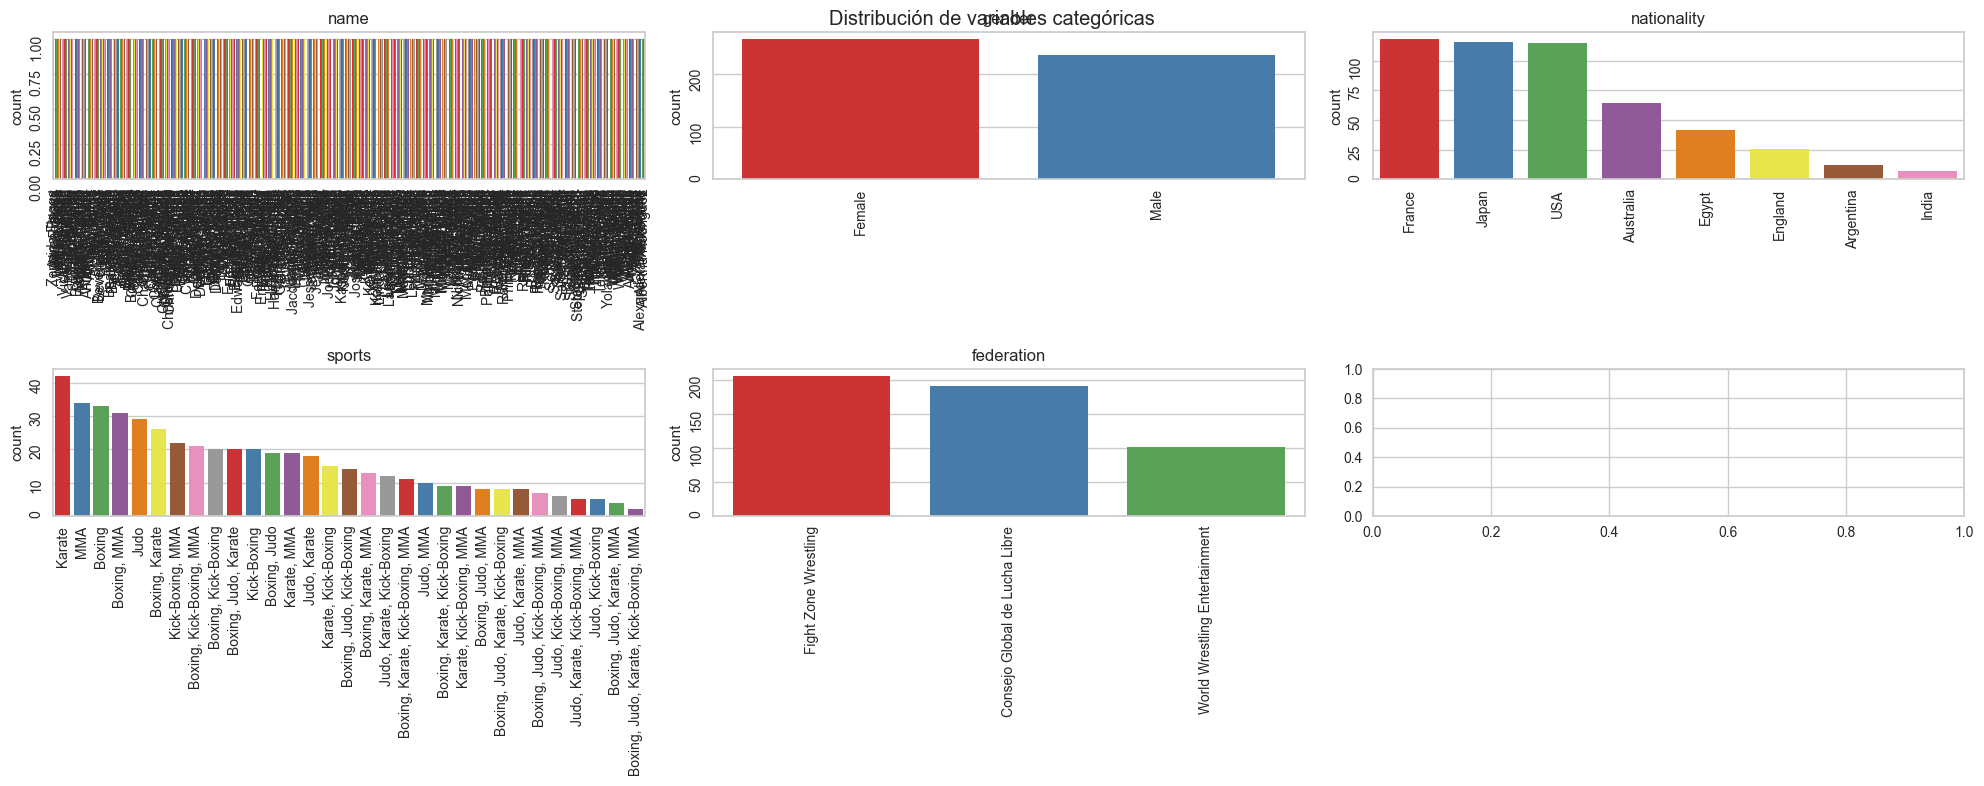

In [247]:
visual.plot_categoricas(tamano_grafica=(20,8))

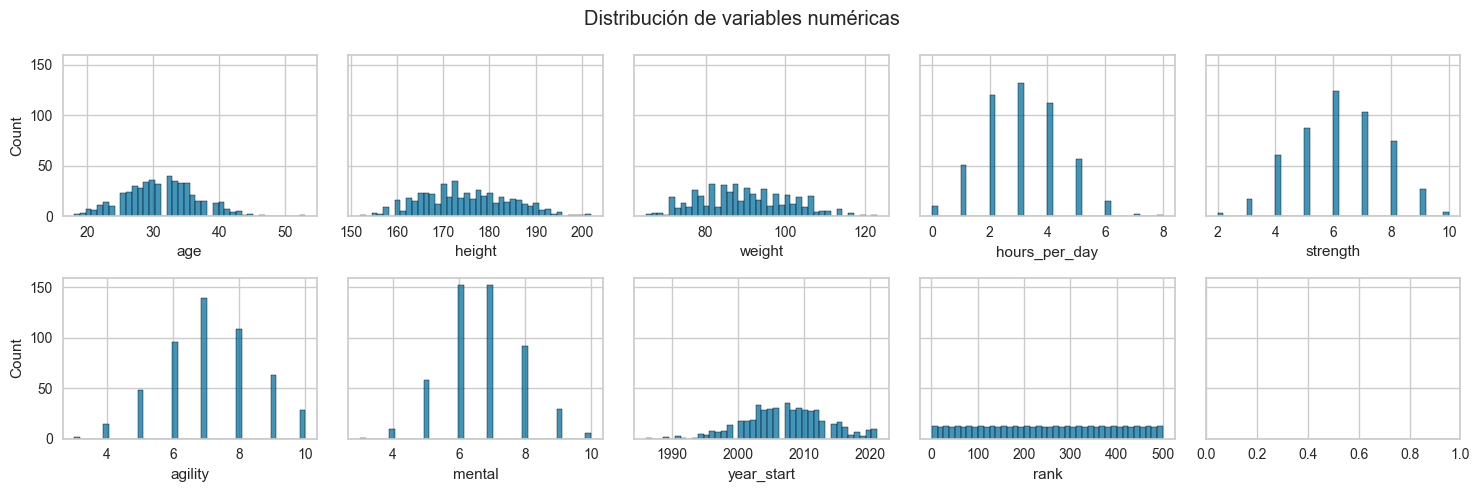

In [248]:
visual.plot_numericas()

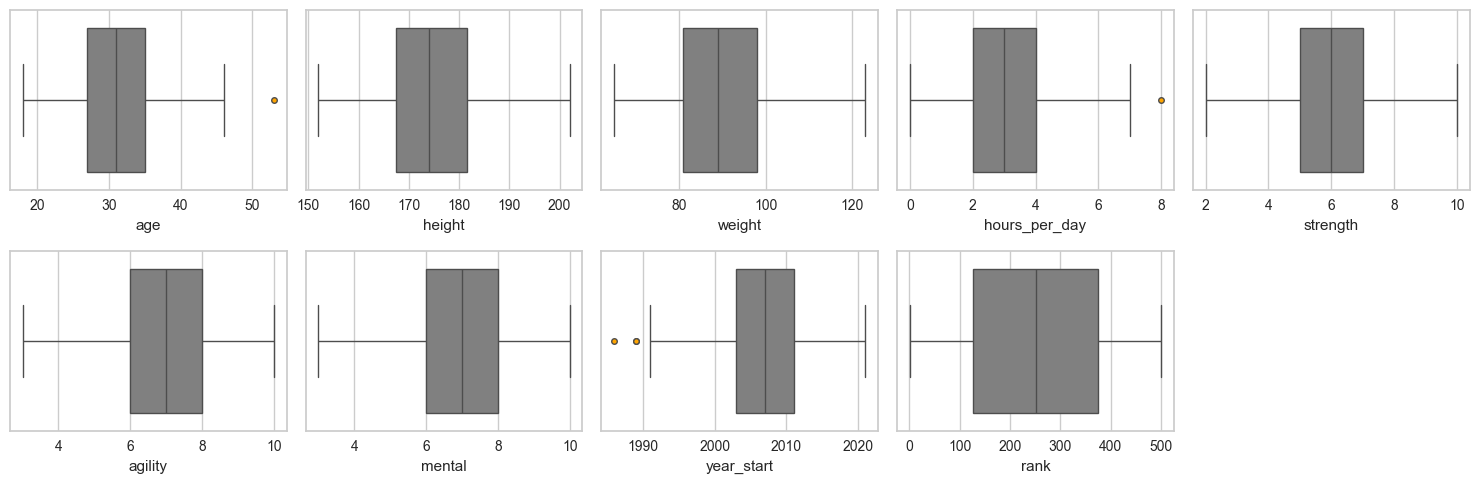

In [249]:
visual.deteccion_outliers()

Los outliers de year_start no tienen nada de extraño. Simplemente son mayores.

In [250]:
df[df["year_start"] < 1990]

,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start,rank
0,Aaron Peavy,Female,41,165.0,England,82,"Boxing, MMA",3,7,8,7,Fight Zone Wrestling,1989,42
106,Daniel Boyda,Male,43,188.5,Japan,107,"Boxing, Judo, Karate, Kick-Boxing",5,8,8,9,Fight Zone Wrestling,1989,9
324,Mary Sanford,Female,53,171.0,Japan,87,Judo,3,5,9,6,Fight Zone Wrestling,1986,232


Aquellos que echan más horas al día también son normales, y también tienen mejores métricas que los que no echan muchas horas 

In [251]:
df[(df["hours_per_day"] > 6) | (df["hours_per_day"] < 1)]

,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start,rank
1,Abe Rutland,Male,36,185.0,Japan,100,Judo,0,8,5,9,World Wrestling Entertainment,2006,161
46,Beverley Cole,Female,29,159.5,Argentina,72,MMA,0,4,8,6,World Wrestling Entertainment,2010,282
50,Bob Stacy,Male,27,202.0,England,123,"Boxing, Judo, Kick-Boxing",8,7,7,8,Fight Zone Wrestling,2007,95
57,Brooke Teixeira,Female,45,173.0,USA,89,Boxing,0,5,7,5,Consejo Global de Lucha Libre,1991,430
118,David Ray,Male,31,178.5,USA,94,Kick-Boxing,0,7,6,6,Consejo Global de Lucha Libre,2011,410
128,Derrick Heller,Male,25,182.5,France,96,"Boxing, Judo, Karate, Kick-Boxing",7,7,9,10,Fight Zone Wrestling,2011,25
197,Hung Vogelpohl,Male,28,182.5,Australia,100,"Boxing, Karate, Kick-Boxing, MMA",7,8,9,8,Fight Zone Wrestling,2011,4
239,Jose Banner,Male,27,178.5,France,95,Karate,0,8,6,8,Fight Zone Wrestling,2015,316
340,Micheal Kurz,Male,28,178.5,USA,90,"Boxing, Judo",0,8,5,6,Fight Zone Wrestling,2008,382
343,Moises Cordero,Male,41,183.5,Australia,102,Boxing,0,6,5,7,Fight Zone Wrestling,2002,402


Tratamos datos. No pasamos los años a datetime porque no es adecuado

In [252]:
df.drop(columns = "rank",inplace= True)
df[["strength","agility","mental"]] = df[["strength","agility","mental"]].astype("category")

df["year_start"] = pd.to_datetime(df["year_start"], format="%Y")
df["year_start"] = df["year_start"].map(pd.Timestamp.toordinal).astype(int)
df.head()

,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start
0,Aaron Peavy,Female,41,165.0,England,82,"Boxing, MMA",3,7,8,7,Fight Zone Wrestling,726103
1,Abe Rutland,Male,36,185.0,Japan,100,Judo,0,8,5,9,World Wrestling Entertainment,732312
2,Adrian Quinn,Male,29,178.5,Japan,93,Karate,4,8,8,7,World Wrestling Entertainment,734503
3,Alan Beckham,Male,39,187.5,Japan,107,Judo,3,7,6,8,Fight Zone Wrestling,731216
4,Albertha Rodriguez,Female,29,158.0,USA,72,MMA,1,5,7,7,Consejo Global de Lucha Libre,734503


In [253]:
# Paso 1: Dividir la columna "Sports" en listas
df["sports"] = df["sports"].apply(lambda x: x.split(",") if pd.notnull(x) else [])

# Paso 2: Explode para convertir listas en filas
df_exploded = df.explode("sports", ignore_index=True)

# Resultado final
df_exploded

,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start
0,Aaron Peavy,Female,41,165.0,England,82,Boxing,3,7,8,7,Fight Zone Wrestling,726103
1,Aaron Peavy,Female,41,165.0,England,82,MMA,3,7,8,7,Fight Zone Wrestling,726103
2,Abe Rutland,Male,36,185.0,Japan,100,Judo,0,8,5,9,World Wrestling Entertainment,732312
3,Adrian Quinn,Male,29,178.5,Japan,93,Karate,4,8,8,7,World Wrestling Entertainment,734503
4,Alan Beckham,Male,39,187.5,Japan,107,Judo,3,7,6,8,Fight Zone Wrestling,731216
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,Yolanda Yamashiro,Female,32,177.0,France,92,Judo,2,5,5,5,Consejo Global de Lucha Libre,734503
1034,Zenaida Flagge,Female,21,170.5,France,85,Boxing,4,6,10,5,Consejo Global de Lucha Libre,734138
1035,Zenaida Flagge,Female,21,170.5,France,85,Judo,4,6,10,5,Consejo Global de Lucha Libre,734138
1036,Zenaida Flagge,Female,21,170.5,France,85,Kick-Boxing,4,6,10,5,Consejo Global de Lucha Libre,734138


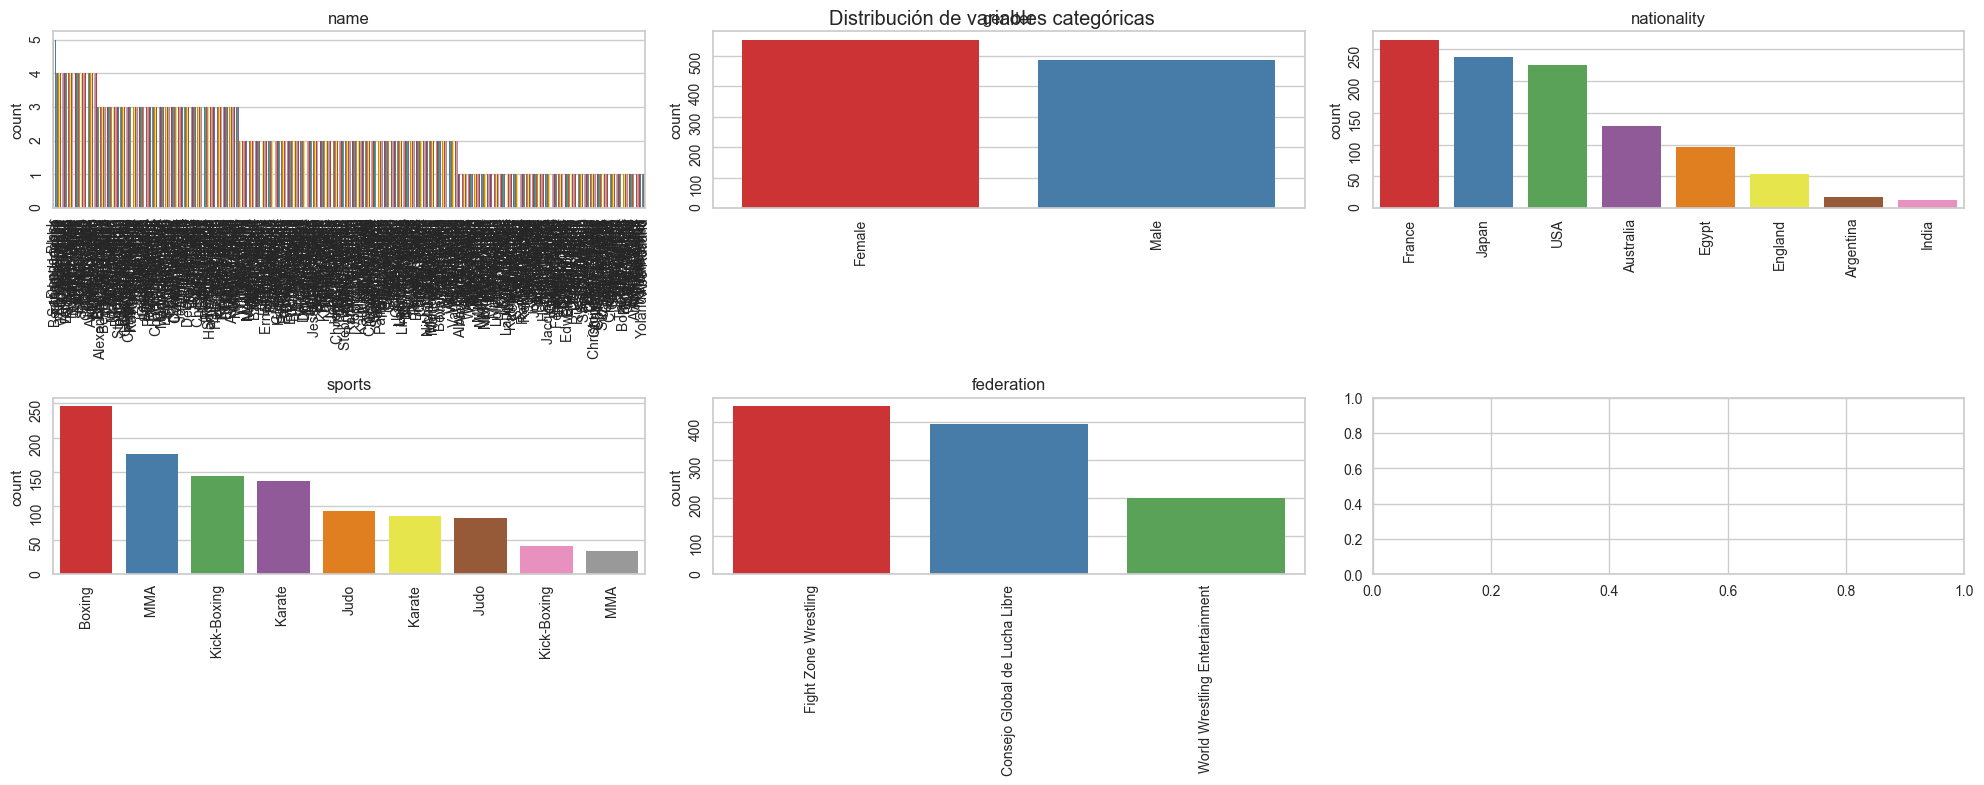

In [254]:
visual = s_eda.Visualizador(df_exploded)
visual.plot_categoricas(tamano_grafica= (20,8))

# ENCODING

In [255]:
sep = s_eda.Visualizador(df_exploded)
df_num,df_cat = sep.separar_dataframes()

In [256]:
for col in df_exploded.columns:
    if col in df_num.columns:
        df.rename(columns={col: col + "_num"},inplace= True)
    elif col in df_cat.columns:
        df.rename(columns={col: col + "_cat"},inplace= True)  

In [257]:
sep = s_eda.Visualizador(df_exploded)
df_num,df_cat = sep.separar_dataframes()

In [258]:
df_cat.columns

Index(['name', 'gender', 'nationality', 'sports', 'federation'], dtype='object')

In [259]:
dic_encoding = {"target": ['name', 'gender', 'nationality', 'sports', 'federation'] }
encoding = s_encoding.Encoding(df_exploded,dic_encoding,"weight")
df_enco = encoding.target_encoding()
df_enco.reset_index(drop=True)


,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start
0,88.412142,82.159420,41,165.0,91.488268,82,90.707317,3,7,8,7,89.819005,726103
1,88.412142,82.159420,41,165.0,91.488268,82,88.596591,3,7,8,7,89.819005,726103
2,90.841836,97.777778,36,185.0,87.798319,100,88.269629,0,8,5,9,87.835821,732312
3,89.931076,97.777778,29,178.5,87.798319,93,86.745276,4,8,8,7,87.835821,734503
4,91.752595,97.777778,39,187.5,87.798319,107,88.269629,3,7,6,8,89.819005,731216
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,89.800968,82.159420,32,177.0,91.766038,92,88.269629,2,5,5,5,89.916456,734503
1034,88.720838,82.159420,21,170.5,91.766038,85,90.707317,4,6,10,5,89.916456,734138
1035,88.720838,82.159420,21,170.5,91.766038,85,92.226118,4,6,10,5,89.916456,734138
1036,88.720838,82.159420,21,170.5,91.766038,85,88.548615,4,6,10,5,89.916456,734138


# Scaling

In [260]:
#Standard
escalador_standard = StandardScaler()
lista_columnas = df_exploded.columns.drop("year_start")

for columna in lista_columnas:
    datos_transf_stand = escalador_standard.fit_transform(df_enco[[columna]])  
    df_enco[f"{columna}_stand"] = datos_transf_stand

df_enco = df_enco.drop(columns= lista_columnas)

In [261]:
df_enco

,year_start,name_stand,gender_stand,age_stand,height_stand,nationality_stand,weight_stand,sports_stand,hours_per_day_stand,strength_stand,agility_stand,mental_stand,federation_stand
0,726103,-0.647400,-0.938315,1.865988,-1.033501,1.259358,-0.679055,0.831131,-0.335907,0.605755,0.371262,0.170580,0.432048
1,726103,-0.647400,-0.938315,1.865988,-1.033501,1.259358,-0.679055,-0.570511,-0.335907,0.605755,0.371262,0.170580,0.432048
2,732312,0.840312,1.065740,0.933802,1.094386,-1.077009,0.956770,-0.787633,-2.492640,1.263468,-1.693222,1.817667,-2.037610
3,734503,0.282650,1.065740,-0.371258,0.402823,-1.077009,0.320616,-1.799890,0.383004,1.263468,0.371262,0.170580,-2.037610
4,731216,1.397974,1.065740,1.493114,1.360372,-1.077009,1.592925,-0.787633,-0.335907,0.605755,-1.005060,0.994124,0.432048
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,734503,0.202984,-0.938315,0.188054,0.243231,1.435233,0.229737,-0.787633,-1.054818,-0.709671,-1.693222,-1.476508,0.553404
1034,734138,-0.458385,-0.938315,-1.862755,-0.448332,1.435233,-0.406417,0.831131,0.383004,-0.051958,1.747585,-1.476508,0.553404
1035,734138,-0.458385,-0.938315,-1.862755,-0.448332,1.435233,-0.406417,1.839701,0.383004,-0.051958,1.747585,-1.476508,0.553404
1036,734138,-0.458385,-0.938315,-1.862755,-0.448332,1.435233,-0.406417,-0.602370,0.383004,-0.051958,1.747585,-1.476508,0.553404


# Clustering

In [262]:
df_enco.dtypes

year_start               int64
name_stand             float64
gender_stand           float64
age_stand              float64
height_stand           float64
nationality_stand      float64
weight_stand           float64
sports_stand           float64
hours_per_day_stand    float64
strength_stand         float64
agility_stand          float64
mental_stand           float64
federation_stand       float64
dtype: object

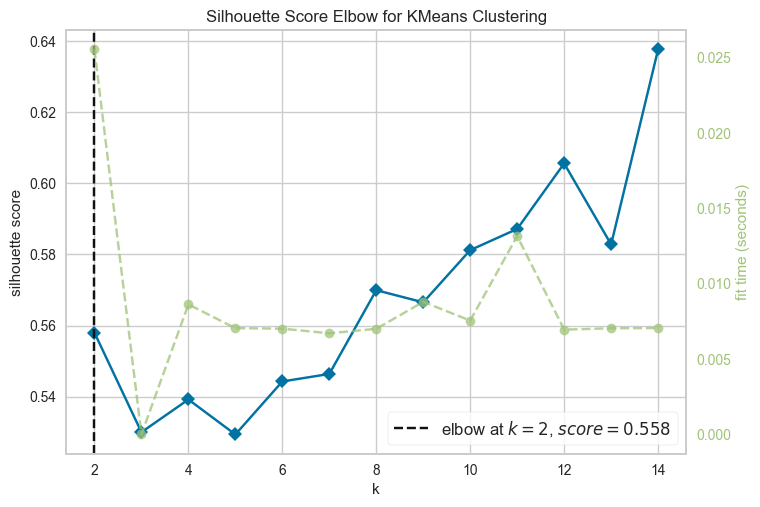

In [263]:
# instanciamos la clase de clustering
df_copia = df_enco.copy()
modelos = s_clustering.Clustering(df_copia)

# sacamos el número de clusters óptimos para hacer el Kmeans 
modelos.sacar_clusters_kmeans()

Vamos a probar a ver qué resultados nos da el df explotado

In [264]:
# aplicamos el modelo de Kmeans al dataframe 
df, labels  = modelos.modelo_kmeans(df_enco, 8)

# mostramos el DataFrame
df_enco.head()


,year_start,name_stand,gender_stand,age_stand,height_stand,nationality_stand,weight_stand,sports_stand,hours_per_day_stand,strength_stand,agility_stand,mental_stand,federation_stand,clusters_kmeans
0,726103,-0.647400,-0.938315,1.865988,-1.033501,1.259358,-0.679055,0.831131,-0.335907,0.605755,0.371262,0.170580,0.432048,3
1,726103,-0.647400,-0.938315,1.865988,-1.033501,1.259358,-0.679055,-0.570511,-0.335907,0.605755,0.371262,0.170580,0.432048,3
2,732312,0.840312,1.065740,0.933802,1.094386,-1.077009,0.956770,-0.787633,-2.492640,1.263468,-1.693222,1.817667,-2.037610,5
3,734503,0.282650,1.065740,-0.371258,0.402823,-1.077009,0.320616,-1.799890,0.383004,1.263468,0.371262,0.170580,-2.037610,2
4,731216,1.397974,1.065740,1.493114,1.360372,-1.077009,1.592925,-0.787633,-0.335907,0.605755,-1.005060,0.994124,0.432048,4


In [265]:
s_clustering.calcular_metricas(df_enco, labels=df_enco["clusters_kmeans"])

,silhouette_score,davies_bouldin_index,cardinalidad
0,0.56537,0.510946,NaN


In [266]:
unique, counts = np.unique(labels, return_counts=True)

dic_metricas = dict(zip(labels,counts))

len(dic_metricas)

4

In [267]:
df

,year_start,name_stand,gender_stand,age_stand,height_stand,nationality_stand,weight_stand,sports_stand,hours_per_day_stand,strength_stand,agility_stand,mental_stand,federation_stand,clusters_kmeans
0,726103,-0.647400,-0.938315,1.865988,-1.033501,1.259358,-0.679055,0.831131,-0.335907,0.605755,0.371262,0.170580,0.432048,3
1,726103,-0.647400,-0.938315,1.865988,-1.033501,1.259358,-0.679055,-0.570511,-0.335907,0.605755,0.371262,0.170580,0.432048,3
2,732312,0.840312,1.065740,0.933802,1.094386,-1.077009,0.956770,-0.787633,-2.492640,1.263468,-1.693222,1.817667,-2.037610,5
3,734503,0.282650,1.065740,-0.371258,0.402823,-1.077009,0.320616,-1.799890,0.383004,1.263468,0.371262,0.170580,-2.037610,2
4,731216,1.397974,1.065740,1.493114,1.360372,-1.077009,1.592925,-0.787633,-0.335907,0.605755,-1.005060,0.994124,0.432048,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,734503,0.202984,-0.938315,0.188054,0.243231,1.435233,0.229737,-0.787633,-1.054818,-0.709671,-1.693222,-1.476508,0.553404,2
1034,734138,-0.458385,-0.938315,-1.862755,-0.448332,1.435233,-0.406417,0.831131,0.383004,-0.051958,1.747585,-1.476508,0.553404,2
1035,734138,-0.458385,-0.938315,-1.862755,-0.448332,1.435233,-0.406417,1.839701,0.383004,-0.051958,1.747585,-1.476508,0.553404,2
1036,734138,-0.458385,-0.938315,-1.862755,-0.448332,1.435233,-0.406417,-0.602370,0.383004,-0.051958,1.747585,-1.476508,0.553404,2


El df explotado no separa bien los valores porque tenemos valores muy iguales en todos los clusters 

TypeError: agg function failed [how->mean,dtype->object]

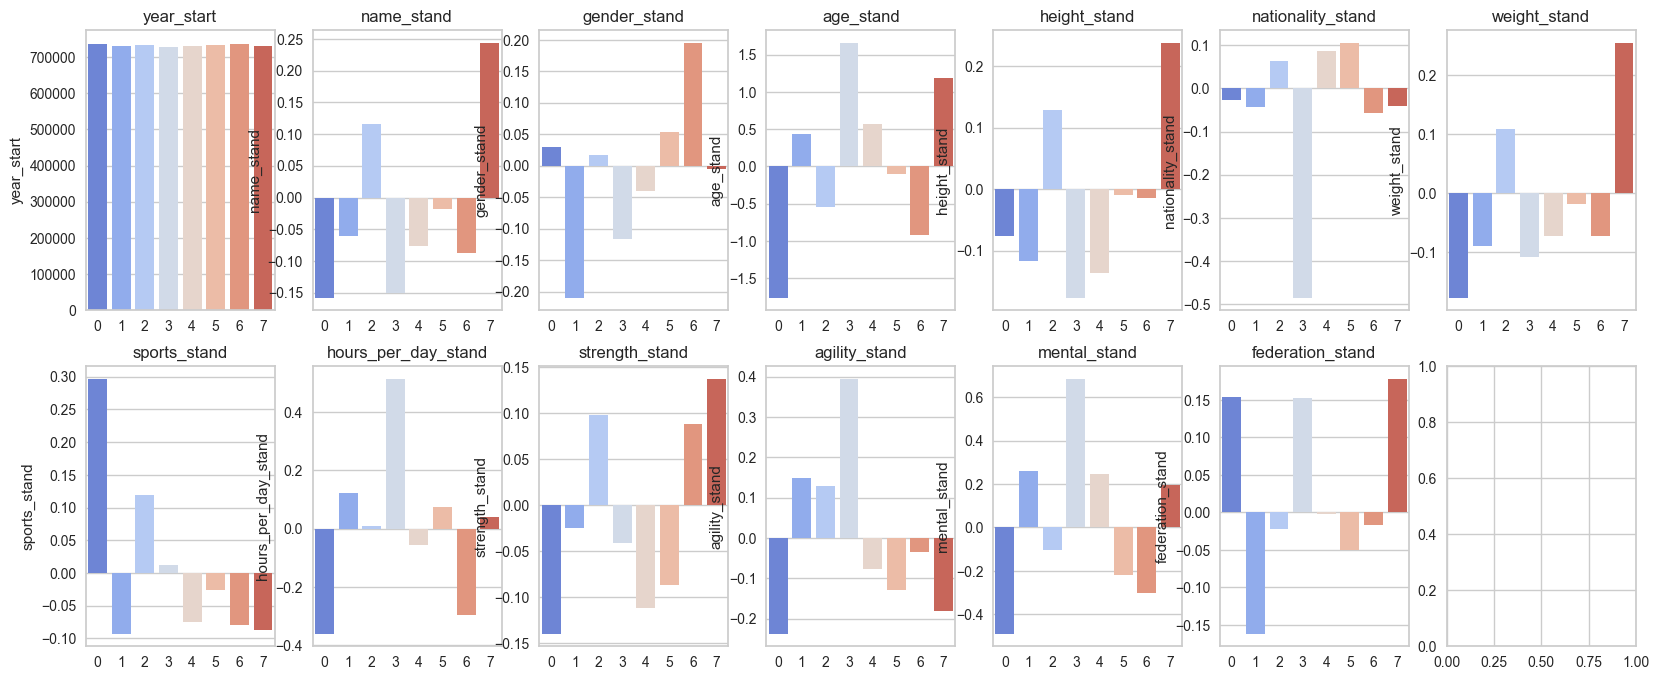

In [268]:
lista_cols = df.columns
fig, axes =plt.subplots(nrows=2, ncols=math.ceil(len(lista_cols)/2), figsize=(20,8))
axes=axes.flat
for indice, columna in enumerate(lista_cols):
    df_group= df.groupby("clusters_kmeans")[columna].mean().reset_index()
    sns.barplot(x="clusters_kmeans", y= columna ,hue="clusters_kmeans", data= df_group, ax=axes[indice],palette="coolwarm")
    axes[indice].set_title(columna)
    axes[indice].set_xlabel("")
plt.tight_layout()
fig.delaxes(axes[-1])

Clustering dbscan

In [273]:
df_copy = df_enco.copy()
df_copy.drop(columns = "name_stand", inplace= True)

In [274]:
modelos = s_clustering.Clustering(df_copy)
df_dbscan = modelos.modelo_dbscan(dataframe_original=df_copy)
df_dbscan.head()

eps: 0.5, min_samples: 3, silhouette: -0.7290820174686082
eps: 0.5, min_samples: 2, silhouette: -0.4278925786560829
eps: 0.5, min_samples: 1, silhouette: 0.2528464841534696
eps: 1.0, min_samples: 3, silhouette: -0.7239727198825747
eps: 1.0, min_samples: 2, silhouette: -0.36164436782421244
eps: 1.0, min_samples: 1, silhouette: 0.2779621979386061
eps: 1.5, min_samples: 3, silhouette: -0.11827485171348562
eps: 1.5, min_samples: 2, silhouette: 0.2953169507606453
eps: 1.5, min_samples: 1, silhouette: 0.4606774532730872


,year_start,gender_stand,age_stand,height_stand,nationality_stand,weight_stand,sports_stand,hours_per_day_stand,strength_stand,agility_stand,mental_stand,federation_stand,clusters_kmeans,clusters_dbscan
0,726103,-0.938315,1.865988,-1.033501,1.259358,-0.679055,0.831131,-0.335907,0.605755,0.371262,0.170580,0.432048,3,0
1,726103,-0.938315,1.865988,-1.033501,1.259358,-0.679055,-0.570511,-0.335907,0.605755,0.371262,0.170580,0.432048,3,0
2,732312,1.065740,0.933802,1.094386,-1.077009,0.956770,-0.787633,-2.492640,1.263468,-1.693222,1.817667,-2.037610,5,1
3,734503,1.065740,-0.371258,0.402823,-1.077009,0.320616,-1.799890,0.383004,1.263468,0.371262,0.170580,-2.037610,2,2
4,731216,1.065740,1.493114,1.360372,-1.077009,1.592925,-0.787633,-0.335907,0.605755,-1.005060,0.994124,0.432048,4,3


In [275]:
s_clustering.calcular_metricas(df_dbscan, labels= df_dbscan["clusters_dbscan"])

,silhouette_score,davies_bouldin_index,cardinalidad
0,0.714359,0.093027,2


TypeError: agg function failed [how->mean,dtype->object]

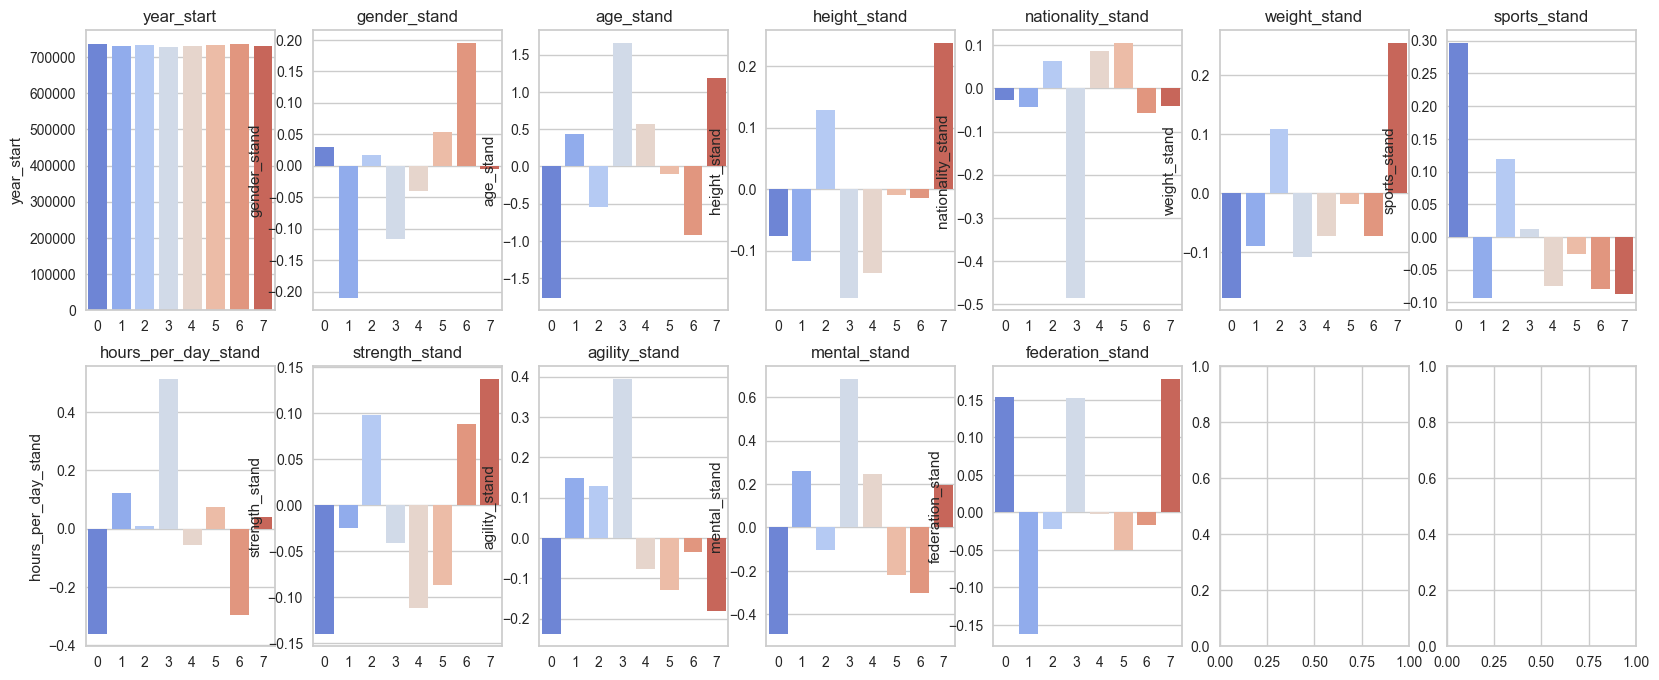

In [276]:
lista_cols = df_dbscan.columns
fig, axes =plt.subplots(nrows=2, ncols=math.ceil(len(lista_cols)/2), figsize=(20,8))
axes=axes.flat
for indice, columna in enumerate(lista_cols):
    df_group= df_dbscan.groupby("clusters_kmeans")[columna].mean().reset_index()
    sns.barplot(x="clusters_kmeans", y= columna ,hue="clusters_kmeans", data= df_group, ax=axes[indice],palette="coolwarm")
    axes[indice].set_title(columna)
    axes[indice].set_xlabel("")
plt.tight_layout()
fig.delaxes(axes[-1])